# **Les graphiques**
## Objectifs
- #### Comment utiliser la fonction `apply`.
- #### Comment utiliser la fonction `plot`.
- #### Comment faire un boxplot.

---
## La fonction `apply`

## On importe nos données.

In [58]:
dat <- read.csv(file = "data/inflammation-01.csv", header = FALSE)

In [59]:
str(dat) # la fonction str pour voir la structure des données 40 journées, 60 patients

'data.frame':	60 obs. of  40 variables:
 $ V1 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ V2 : int  0 1 1 0 1 0 0 0 0 1 ...
 $ V3 : int  1 2 1 2 1 1 2 1 0 1 ...
 $ V4 : int  3 1 3 0 3 2 2 2 3 2 ...
 $ V5 : int  1 2 3 4 3 2 4 3 1 1 ...
 $ V6 : int  2 1 2 2 1 4 2 1 5 3 ...
 $ V7 : int  4 3 6 2 3 2 2 2 6 5 ...
 $ V8 : int  7 2 2 1 5 1 5 3 5 3 ...
 $ V9 : int  8 2 5 6 2 6 5 5 5 5 ...
 $ V10: int  3 6 9 7 4 4 8 3 8 8 ...
 $ V11: int  3 10 5 10 4 7 6 7 2 6 ...
 $ V12: int  3 11 7 7 7 6 5 8 4 8 ...
 $ V13: int  10 5 4 9 6 6 11 8 11 12 ...
 $ V14: int  5 9 5 13 5 9 9 5 12 5 ...
 $ V15: int  7 4 4 8 3 9 4 10 10 13 ...
 $ V16: int  4 4 15 8 10 15 13 9 11 6 ...
 $ V17: int  7 7 5 15 8 4 5 15 9 13 ...
 $ V18: int  7 16 11 10 10 16 12 11 10 8 ...
 $ V19: int  12 8 9 10 6 18 10 18 17 16 ...
 $ V20: int  18 6 10 7 17 12 6 19 11 8 ...
 $ V21: int  6 18 19 17 9 12 9 20 6 18 ...
 $ V22: int  13 4 14 4 14 5 17 8 16 15 ...
 $ V23: int  11 12 12 4 9 18 15 5 12 16 ...
 $ V24: int  11 5 17 7 7 9 8 13 6 14 ...
 $ V25: 

In [6]:
head(dat) # On veut voir les premières rangées (Patients).

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,0,1,3,1,2,4,7,8,3,⋯,4,4,5,7,3,4,2,3,0,0
2,0,1,2,1,2,1,3,2,2,6,⋯,3,5,4,4,5,5,1,1,0,1
3,0,1,1,3,3,2,6,2,5,9,⋯,10,5,4,2,2,3,2,2,1,1
4,0,0,2,0,4,2,2,1,6,7,⋯,3,5,6,3,3,4,2,3,2,1
5,0,1,1,3,3,1,3,5,2,4,⋯,9,6,3,2,2,4,2,0,1,1
6,0,0,1,2,2,4,2,1,6,4,⋯,8,4,7,3,5,4,4,3,2,1


In [1]:
help(apply)

apply {base},R Documentation
X,"an array, including a matrix."
MARGIN,"a vector giving the subscripts which the function will be applied over. E.g., for a matrix 1 indicates rows, 2 indicates columns, c(1, 2) indicates rows and columns. Where X has named dimnames, it can be a character vector selecting dimension names."
FUN,"the function to be applied: see ‘Details’. In the case of functions like +, %*%, etc., the function name must be backquoted or quoted."
...,optional arguments to FUN.
simplify,a logical indicating whether results should be simplified if possible.


### La fonction `apply` nous permet d'effectuer une fonction sur un ensemble de données. 
### On transforme nos données avant d'afficher avec un graphique.

### apply(X, MARGIN, FUN) 
### (X = array ; MARGIN (1=rangée 2=colonne, c(1,2) ; FUN = fonction.

### Moyenne d'inflammation de chaque patient pour toutes les journées.

In [7]:
## Rangées = patients = 1 ; Colonnes = journées = 2

In [9]:
moyenne_patient = apply(dat, 1, mean)

In [10]:
help(plot)

plot.default {graphics},R Documentation
"x, y","the x and y arguments provide the x and y coordinates for the plot. Any reasonable way of defining the coordinates is acceptable. See the function xy.coords for details. If supplied separately, they must be of the same length."
type,"1-character string giving the type of plot desired. The following values are possible, for details, see plot: ""p"" for points, ""l"" for lines, ""b"" for both points and lines, ""c"" for empty points joined by lines, ""o"" for overplotted points and lines, ""s"" and ""S"" for stair steps and ""h"" for histogram-like vertical lines. Finally, ""n"" does not produce any points or lines."
xlim,"the x limits (x1, x2) of the plot. Note that x1 > x2 is allowed and leads to a ‘reversed axis’. The default value, NULL, indicates that the range of the finite values to be plotted should be used."
ylim,the y limits of the plot.
log,"a character string which contains ""x"" if the x axis is to be logarithmic, ""y"" if the y axis is to be logarithmic and ""xy"" or ""yx"" if both axes are to be logarithmic."
main,"a main title for the plot, see also title."
sub,a subtitle for the plot.
xlab,"a label for the x axis, defaults to a description of x."
ylab,"a label for the y axis, defaults to a description of y."
ann,a logical value indicating whether the default annotation (title and x and y axis labels) should appear on the plot.


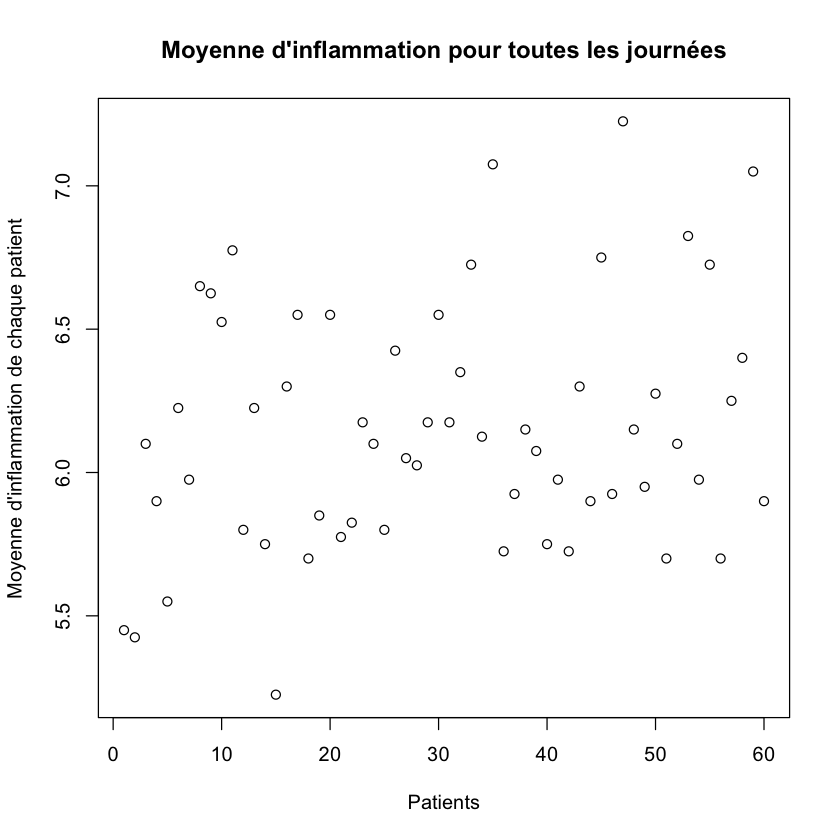

In [11]:
plot(moyenne_patient, main="Moyenne d'inflammation pour toutes les journées", xlab="Patients", ylab="Moyenne d'inflammation de chaque patient")

### La valeur d'inflammation maximum pour chaque journée.

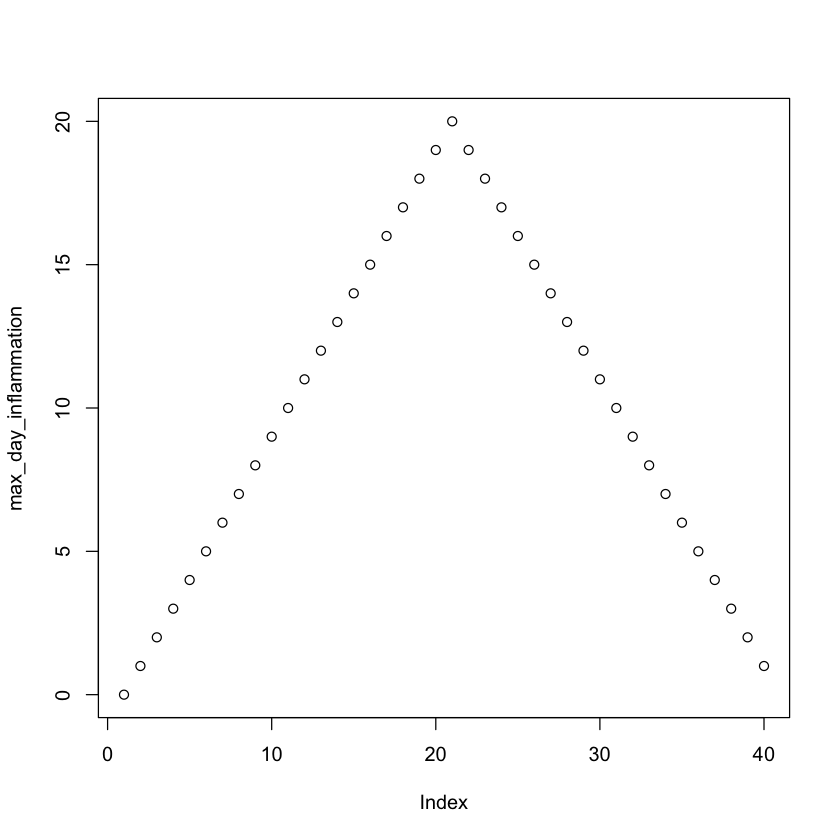

In [16]:
max_day_inflammation = apply(dat, 2, max)
plot(max_day_inflammation)

### La valeur d'inflammation minimum pour chaque journée.

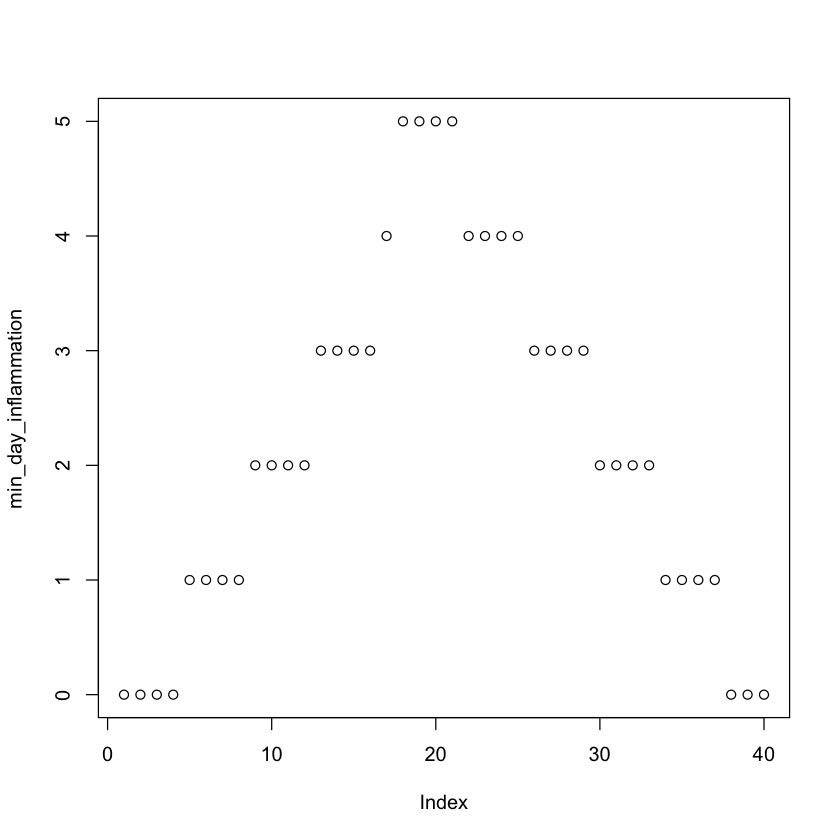

In [17]:
min_day_inflammation <- apply(dat, 2, min)
plot(min_day_inflammation)

## **Allons un peu plus loin...**
### Utiliser une fonction pour réaliser nos graphiques de bases pour avoir la moyenne, le minimum et le maximum des points d'inflammation dans le temps.

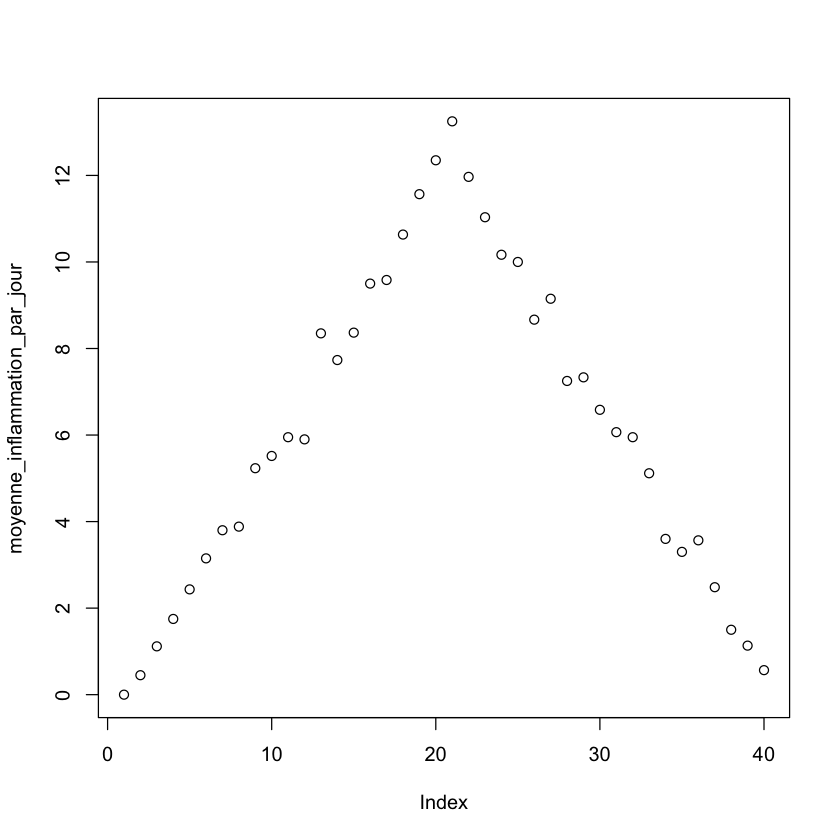

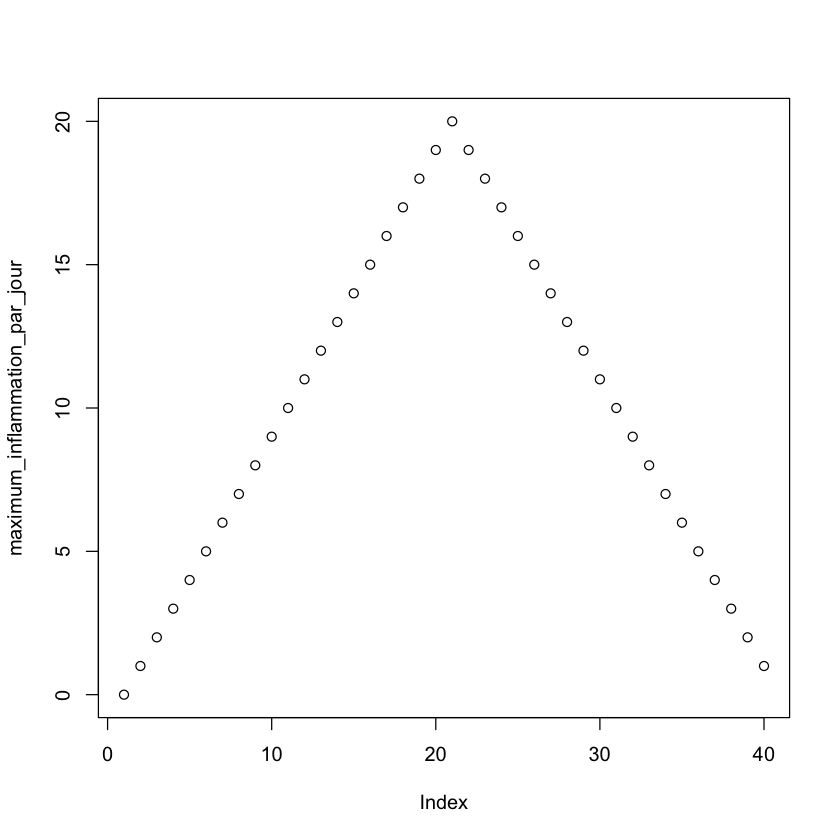

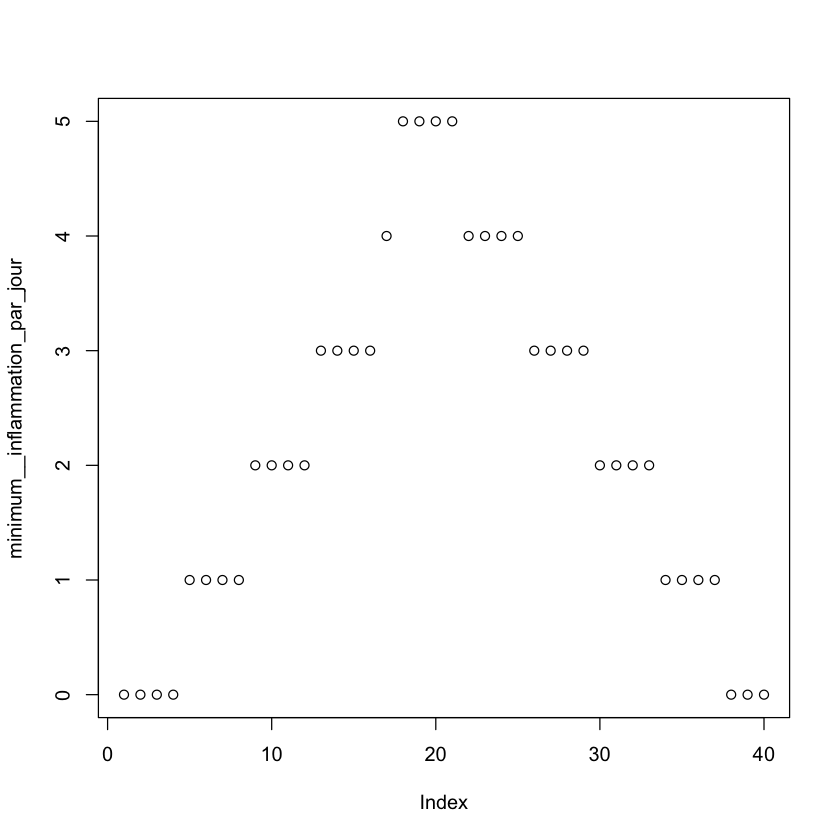

In [1]:
analyse = function(nom_du_fichier) {
  # Graphique de la moyenne, du minimum et du maximum dans le temps.
    
  # La valeur d'entrée est un string de type caractère représentant un fichier csv.
    
  # On charge nos données.  
  dat = read.csv(file = nom_du_fichier, header = FALSE)
    
  moyenne_inflammation_par_jour = apply(dat, 2, mean)
  plot(moyenne_inflammation_par_jour)
    
  maximum_inflammation_par_jour = apply(dat, 2, max)
  plot(maximum_inflammation_par_jour)
    
  minimum__inflammation_par_jour = apply(dat, 2, min)
  plot(minimum__inflammation_par_jour)
}

analyse("data/inflammation-01.csv")

## **Exercice**
### Mettre en graphique la moyenne d'inflammation des patients 1 à 5 pour les 40 journées.
### Ajouter un titre et le nom des axes.

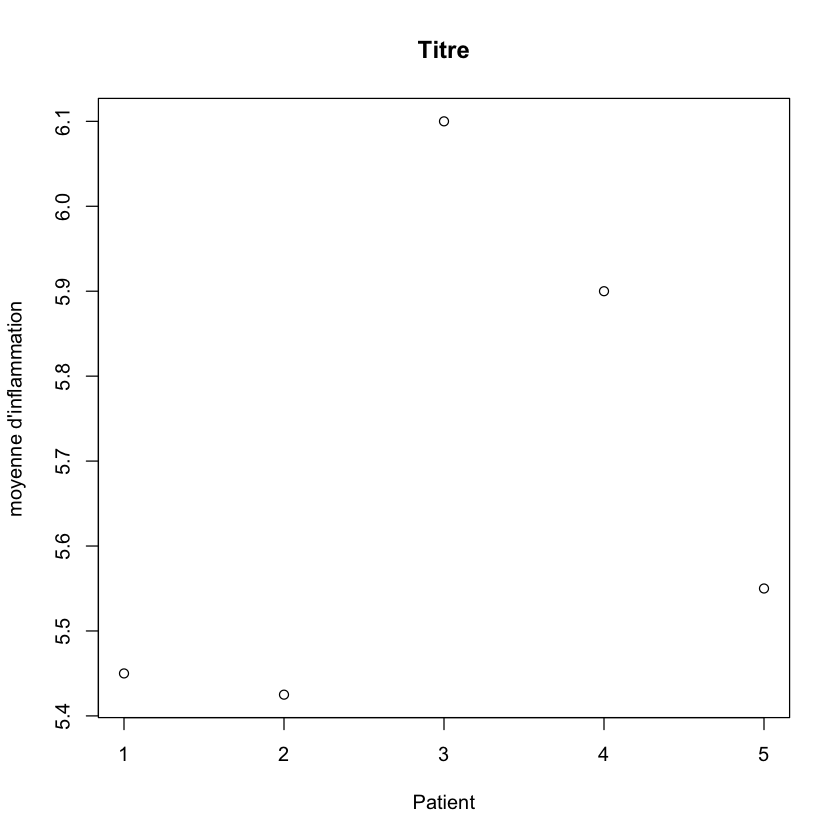

In [32]:
moyenne_P1_P5 = apply(dat[1:5, ], 1, mean)
plot(moyenne_P1_P5, main="Titre", xlab="Patient", ylab="moyenne d'inflammation")

## Comment réaliser un boxplot.

In [38]:
help(boxplot)

boxplot {graphics},R Documentation
formula,"a formula, such as y ~ grp, where y is a numeric vector of data values to be split into groups according to the grouping variable grp (usually a factor). Note that ~ g1 + g2 is equivalent to g1:g2."
data,a data.frame (or list) from which the variables in formula should be taken.
subset,an optional vector specifying a subset of observations to be used for plotting.
na.action,a function which indicates what should happen when the data contain NAs. The default is to ignore missing values in either the response or the group.
"xlab, ylab","x- and y-axis annotation, since R 3.6.0 with a non-empty default. Can be suppressed by ann=FALSE."
ann,logical indicating if axes should be annotated (by xlab and ylab).
"drop, sep, lex.order","passed to split.default, see there."
x,"for specifying data from which the boxplots are to be produced. Either a numeric vector, or a single list containing such vectors. Additional unnamed arguments specify further data as separate vectors (each corresponding to a component boxplot). NAs are allowed in the data."
...,"For the formula method, named arguments to be passed to the default method. For the default method, unnamed arguments are additional data vectors (unless x is a list when they are ignored), and named arguments are arguments and graphical parameters to be passed to bxp in addition to the ones given by argument pars (and override those in pars). Note that bxp may or may not make use of graphical parameters it is passed: see its documentation."
range,"this determines how far the plot whiskers extend out from the box. If range is positive, the whiskers extend to the most extreme data point which is no more than range times the interquartile range from the box. A value of zero causes the whiskers to extend to the data extremes."


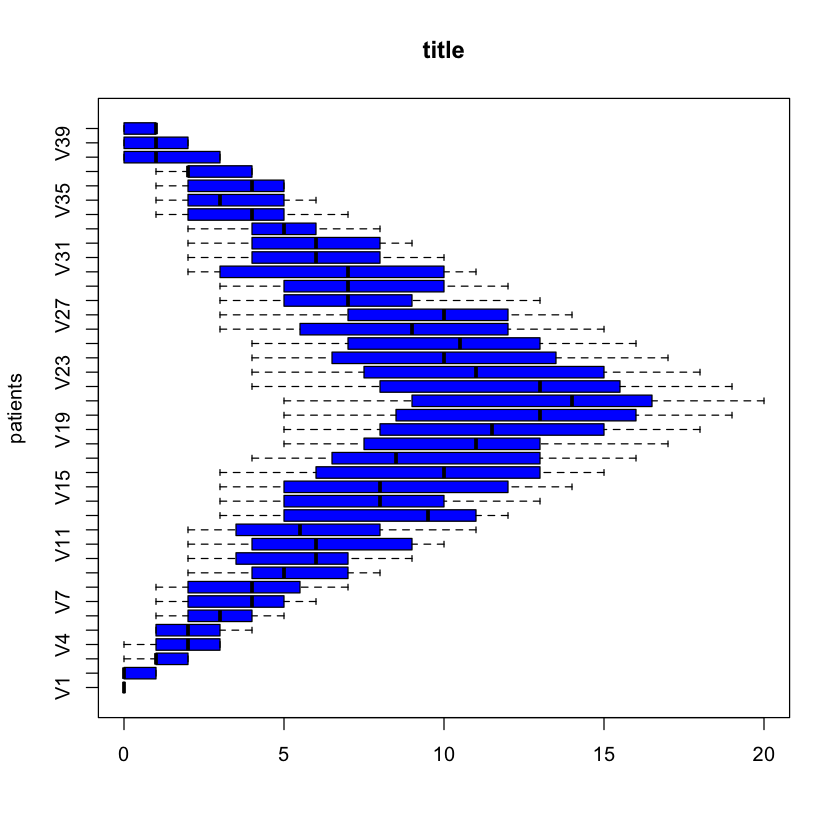

In [54]:
boxplot(dat[,], ylab = "patients", horizontal=TRUE, col = "blue", main = "title")

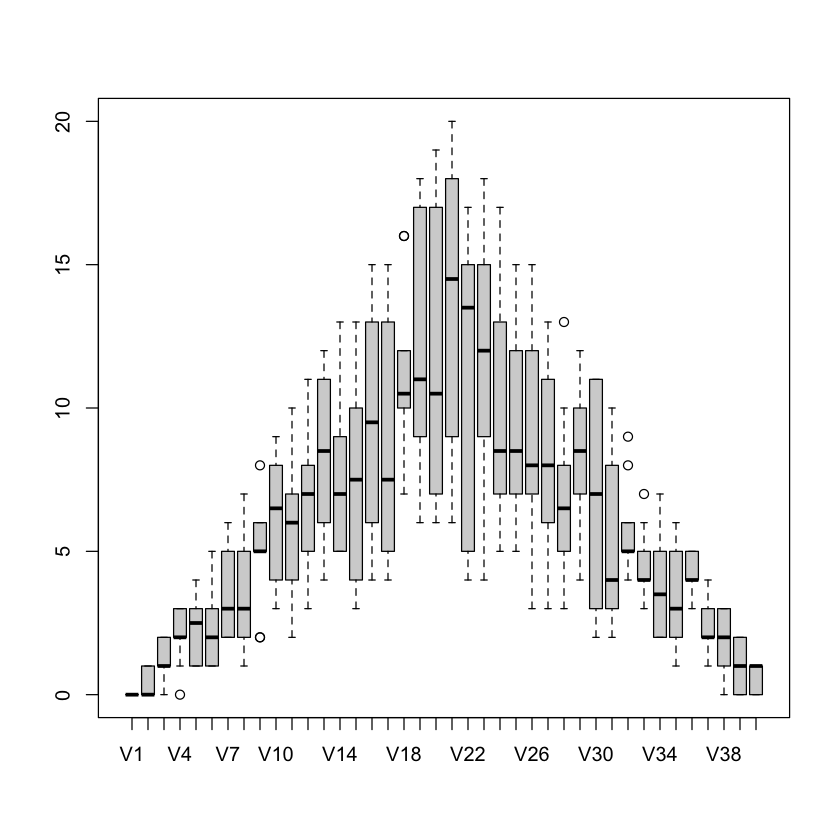

In [32]:
boxplot(dat[1:10,])

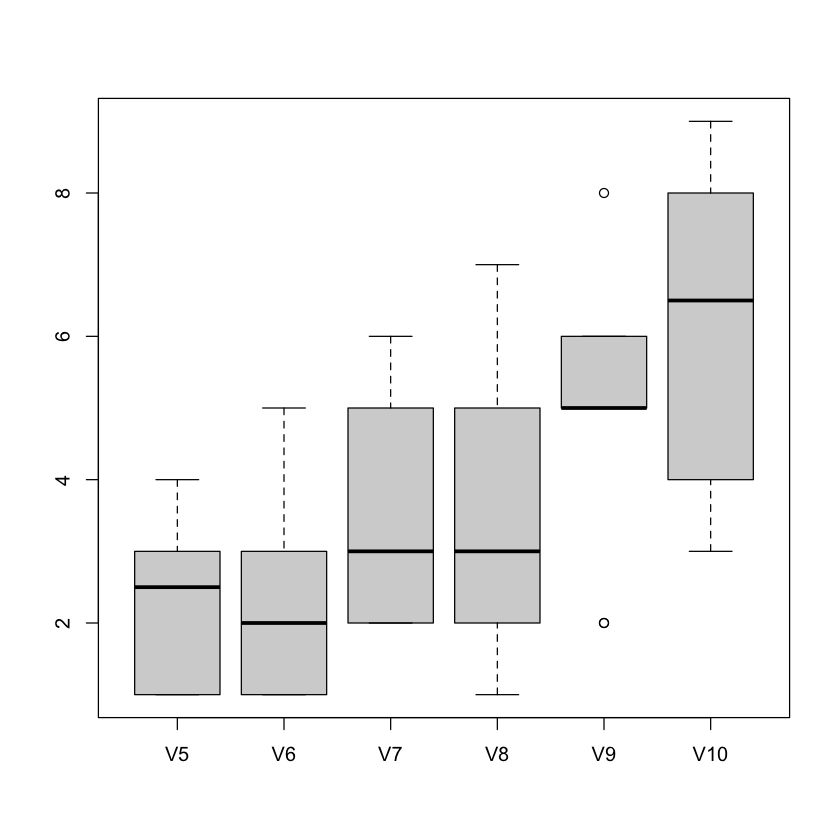

In [33]:
boxplot(dat[1:10,5:10])

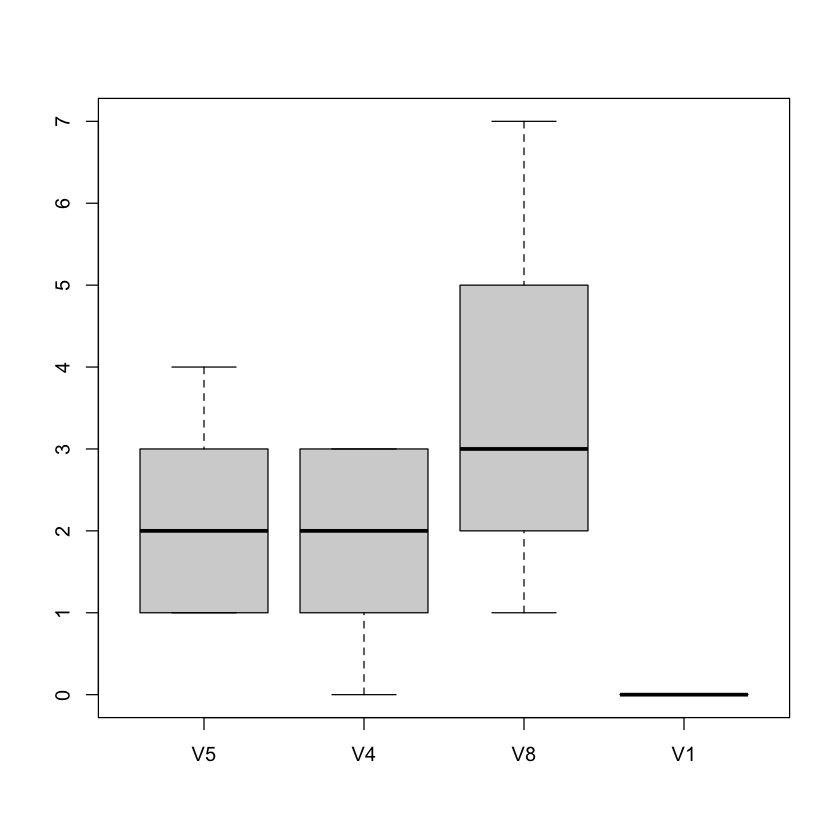

In [36]:
boxplot(dat[1:40,c(5,4,8,1)])

---
## **En résumé:**
- #### La fonction `apply` sert à préparer les données en effectuant une fonction sur une sélection de données.
- #### Visualiser des données avec `plot` et `boxplot`.
- #### Utiliser `help` pour explorer toutes les options possibles.
